In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 127.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 109.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [2]:
from google.colab import files
uploaded = files.upload()  # chọn file yolo_dataset.zip


Saving yolo_dataset.zip to yolo_dataset.zip


In [3]:
import zipfile
import os
import shutil

# Bước 1: Giải nén file zip
with zipfile.ZipFile("yolo_dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("yolo_dataset")

# Bước 2: In ra các file để xem cấu trúc thực tế
print("\n📂 Duyệt các file sau khi giải nén:")
for root, dirs, files in os.walk("yolo_dataset"):
    for file in files:
        print(os.path.join(root, file))

# Bước 3: Tự động phát hiện nếu có lồng thư mục yolo_dataset/yolo_dataset
inner_path = "yolo_dataset/yolo_dataset"
if os.path.exists(inner_path):
    print("\n🔁 Đã phát hiện thư mục lồng nhau → Đang chỉnh sửa...")
    shutil.move(inner_path, "tmp_yolo_dataset")
    shutil.rmtree("yolo_dataset")        # Xóa thư mục lồng
    shutil.move("tmp_yolo_dataset", "yolo_dataset")

# Bước 4: In nội dung file data.yaml (nếu có)
yaml_path = "yolo_dataset/data.yaml"
if os.path.exists(yaml_path):
    print("\n📄 Nội dung data.yaml:")
    with open(yaml_path, "r") as f:
        print(f.read())
else:
    print("\n⚠️ Không tìm thấy file data.yaml trong yolo_dataset/")



📂 Duyệt các file sau khi giải nén:
yolo_dataset/yolo_dataset/data.yaml
yolo_dataset/yolo_dataset/images/train/giay5.jpg
yolo_dataset/yolo_dataset/images/train/nap3.jpg
yolo_dataset/yolo_dataset/images/train/ong1.jpg
yolo_dataset/yolo_dataset/images/train/ong4.jpg
yolo_dataset/yolo_dataset/images/train/bia1.jpg
yolo_dataset/yolo_dataset/images/train/ong.jpg
yolo_dataset/yolo_dataset/images/train/thun3.jpg
yolo_dataset/yolo_dataset/images/train/que1.jpg
yolo_dataset/yolo_dataset/images/train/bia3.jpg
yolo_dataset/yolo_dataset/images/train/bong5.jpg
yolo_dataset/yolo_dataset/images/train/ong3.jpg
yolo_dataset/yolo_dataset/images/train/ong2.jpg
yolo_dataset/yolo_dataset/images/train/chai6.jpg
yolo_dataset/yolo_dataset/images/train/giay3.jpg
yolo_dataset/yolo_dataset/images/train/thun2.jpg
yolo_dataset/yolo_dataset/images/train/thun.jpg
yolo_dataset/yolo_dataset/images/train/giay.jpg
yolo_dataset/yolo_dataset/images/train/go3.jpg
yolo_dataset/yolo_dataset/images/train/bia.jpg
yolo_dataset/

In [4]:
import os

img_dir = "yolo_dataset/images/val"
label_dir = "yolo_dataset/labels/val"

missing = []
for img_file in os.listdir(img_dir):
    base = os.path.splitext(img_file)[0]
    if not os.path.exists(os.path.join(label_dir, base + ".txt")):
        missing.append(img_file)

for img in missing:
    os.remove(os.path.join(img_dir, img))

print(f"Đã xoá {len(missing)} ảnh không có nhãn.")


Đã xoá 1 ảnh không có nhãn.


In [6]:
!cat yolo_dataset/data.yaml

path: /mnt/data/yolo_dataset
train: images/train
val: images/val

names:
  0: chai_nuoc
  1: nap_chai
  2: que_de_luoi
  3: que_xien
  4: bong_bay
  5: nit
  6: giay_mau
  7: ong_hut
  8: bia_cat_tong


In [7]:
# 📄 Nội dung mới chuẩn cho YOLOv8 train trong Google Colab
corrected_yaml = """\
path: .
train: images/train
val: images/val

names:
  0: chai_nuoc
  1: nap_chai
  2: que_de_luoi
  3: que_xien
  4: bong_bay
  5: nit
  6: giay_mau
  7: ong_hut
  8: bia_cat_tong
"""

# ✍️ Ghi đè nội dung vào file data.yaml
with open("yolo_dataset/data.yaml", "w") as f:
    f.write(corrected_yaml)

print("✅ Đã cập nhật thành công file yolo_dataset/data.yaml")

✅ Đã cập nhật thành công file yolo_dataset/data.yaml


In [10]:
# ⚙️ Nội dung chính xác để YOLOv8 tìm đúng ảnh và nhãn
corrected_yaml = """\
path: ./yolo_dataset
train: images/train
val: images/val

names:
  0: chai_nuoc
  1: nap_chai
  2: que_de_luoi
  3: que_xien
  4: bong_bay
  5: nit
  6: giay_mau
  7: ong_hut
  8: bia_cat_tong
"""

# ✍️ Ghi đè nội dung vào file yolo_dataset/data.yaml
with open("yolo_dataset/data.yaml", "w") as f:
    f.write(corrected_yaml)

print("✅ Đã cập nhật xong file yolo_dataset/data.yaml")


✅ Đã cập nhật xong file yolo_dataset/data.yaml


In [11]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
model.train(
    data="yolo_dataset/data.yaml",  # Đường dẫn đầy đủ
    epochs=50,
    imgsz=640,
    batch=16,
    augment=True,
    mosaic=1.0,
    hsv_h=0.015, hsv_s=0.7, hsv_v=0.4,
    flipud=0.5, fliplr=0.5,
    degrees=10, scale=0.5, shear=2
)


Ultralytics 8.3.160 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=yolo_dataset/data.yaml, degrees=10, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, 

100%|██████████| 755k/755k [00:00<00:00, 19.1MB/s]

Overriding model.yaml nc=80 with nc=9

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,012,603 parameters, 3,012,587 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 104MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2009.4±382.3 MB/s, size: 204.1 KB)


train: Scanning /content/yolo_dataset/labels/train... 55 images, 2 backgrounds, 0 corrupt: 100%|██████████| 57/57 [00:00<00:00, 351.26it/s]

train: New cache created: /content/yolo_dataset/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 366.9±211.4 MB/s, size: 78.4 KB)


val: Scanning /content/yolo_dataset/labels/val... 8 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8/8 [00:00<00:00, 1762.31it/s]

val: New cache created: /content/yolo_dataset/labels/val.cache


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000769, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       2.1G      1.828      3.965      2.194         24        640: 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]

                   all          8          8      0.003       0.75     0.0479     0.0189

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       2/50      2.12G       1.96      3.996      2.188         26        640: 100%|██████████| 4/4 [00:00<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.60it/s]

                   all          8          8     0.0059          1     0.0495     0.0251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.14G      1.705      3.906      2.054         29        640: 100%|██████████| 4/4 [00:00<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.74it/s]

                   all          8          8     0.0045      0.875     0.0651     0.0464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.16G      1.752      3.965      2.117         22        640: 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.26it/s]

                   all          8          8    0.00609          1      0.262      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.18G      1.279      3.717      1.699         24        640: 100%|██████████| 4/4 [00:00<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.22it/s]

                   all          8          8    0.00618          1      0.348      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       2.2G      1.216      3.662      1.735         27        640: 100%|██████████| 4/4 [00:00<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.93it/s]

                   all          8          8    0.00595          1      0.435      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.21G      1.239      3.471       1.66         31        640: 100%|██████████| 4/4 [00:00<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all          8          8    0.00571          1      0.363      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.23G      1.332      3.358      1.752         24        640: 100%|██████████| 4/4 [00:01<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]

                   all          8          8    0.00583          1      0.418      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.25G      1.198       3.19      1.646         29        640: 100%|██████████| 4/4 [00:00<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.19it/s]

                   all          8          8    0.00479      0.875      0.352      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.26G      1.129      3.329      1.628         18        640: 100%|██████████| 4/4 [00:00<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.27it/s]

                   all          8          8     0.0054          1      0.362      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.28G      1.281      2.984      1.665         24        640: 100%|██████████| 4/4 [00:00<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]

                   all          8          8    0.00556          1       0.35      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       2.3G      1.197      2.836      1.622         31        640: 100%|██████████| 4/4 [00:00<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.44it/s]

                   all          8          8    0.00538          1      0.355      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.32G      1.148      2.679      1.526         33        640: 100%|██████████| 4/4 [00:00<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.34it/s]

                   all          8          8    0.00488          1      0.294      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.34G      1.085      2.727      1.572         26        640: 100%|██████████| 4/4 [00:00<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.49it/s]

                   all          8          8    0.00488          1       0.37      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.36G      1.155      2.502      1.588         26        640: 100%|██████████| 4/4 [00:00<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.20it/s]

                   all          8          8    0.00465          1      0.372      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.37G      1.117       2.57      1.482         28        640: 100%|██████████| 4/4 [00:00<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.51it/s]


                   all          8          8    0.00449          1      0.491      0.218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.39G      1.169      2.511      1.604         28        640: 100%|██████████| 4/4 [00:00<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

                   all          8          8    0.00455          1      0.496      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.41G      1.151      2.267      1.514         36        640: 100%|██████████| 4/4 [00:01<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all          8          8      0.315       0.65      0.567      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.42G      1.082      2.289      1.561         28        640: 100%|██████████| 4/4 [00:00<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.68it/s]

                   all          8          8    0.00493          1      0.502      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.44G      1.147      2.193      1.594         29        640: 100%|██████████| 4/4 [00:00<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.56it/s]

                   all          8          8      0.749      0.375      0.516       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.46G      1.096      2.167      1.554         22        640: 100%|██████████| 4/4 [00:00<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.32it/s]

                   all          8          8      0.856      0.374      0.526      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.48G      1.172      2.006      1.558         36        640: 100%|██████████| 4/4 [00:00<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.03it/s]

                   all          8          8      0.876      0.319      0.551       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       2.5G      1.137      2.066      1.551         28        640: 100%|██████████| 4/4 [00:00<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.29it/s]

                   all          8          8      0.884      0.375      0.617      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.51G       1.11      1.932      1.519         27        640: 100%|██████████| 4/4 [00:00<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.94it/s]

                   all          8          8      0.852      0.375      0.702      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.53G      1.074      1.817      1.452         33        640: 100%|██████████| 4/4 [00:00<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.18it/s]

                   all          8          8      0.854       0.25      0.767       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.55G      1.158       2.07       1.57         22        640: 100%|██████████| 4/4 [00:00<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.21it/s]

                   all          8          8      0.859      0.375      0.533      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.56G      1.107      1.839      1.447         36        640: 100%|██████████| 4/4 [00:00<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]

                   all          8          8      0.846      0.375      0.624      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.58G      1.141      1.791      1.507         29        640: 100%|██████████| 4/4 [00:01<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

                   all          8          8      0.862      0.375      0.609      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       2.6G      1.099      1.808      1.493         25        640: 100%|██████████| 4/4 [00:00<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.64it/s]

                   all          8          8      0.596      0.579      0.699      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.62G      1.055      1.778      1.475         36        640: 100%|██████████| 4/4 [00:00<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.40it/s]

                   all          8          8      0.349      0.627      0.639      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.63G      1.048      1.657      1.404         39        640: 100%|██████████| 4/4 [00:00<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.05it/s]

                   all          8          8      0.419      0.719      0.651      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.65G      1.074      1.704      1.471         25        640: 100%|██████████| 4/4 [00:00<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.54it/s]


                   all          8          8      0.435      0.685      0.667      0.394

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.66G      1.112      1.729      1.514         36        640: 100%|██████████| 4/4 [00:00<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.08it/s]

                   all          8          8      0.419      0.643      0.651      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.68G      1.024      1.634       1.46         24        640: 100%|██████████| 4/4 [00:00<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


                   all          8          8      0.557      0.625      0.696      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       2.7G        1.1      1.727      1.545         25        640: 100%|██████████| 4/4 [00:00<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.63it/s]

                   all          8          8      0.724      0.625      0.715      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.72G      1.003      1.529      1.443         23        640: 100%|██████████| 4/4 [00:00<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.43it/s]

                   all          8          8       0.75      0.625       0.72      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.73G      1.047      1.496       1.53         39        640: 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]

                   all          8          8      0.736      0.625      0.729      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.75G      1.008      1.557      1.439         41        640: 100%|██████████| 4/4 [00:01<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

                   all          8          8      0.804      0.625      0.709      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.77G      1.037      1.655      1.503         30        640: 100%|██████████| 4/4 [00:00<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.92it/s]


                   all          8          8      0.843      0.625      0.698      0.466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.78G      1.058      1.596       1.43         32        640: 100%|██████████| 4/4 [00:00<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.06it/s]

                   all          8          8      0.849      0.625      0.697      0.474


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       2.8G     0.9271      2.063      1.483         10        640: 100%|██████████| 4/4 [00:02<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]


                   all          8          8      0.853      0.625      0.686      0.463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.82G     0.9633      1.928      1.445         11        640: 100%|██████████| 4/4 [00:00<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.44it/s]


                   all          8          8      0.851      0.625      0.671       0.47

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.84G     0.7964       1.98      1.363         10        640: 100%|██████████| 4/4 [00:00<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.87it/s]


                   all          8          8      0.795      0.625      0.671      0.464

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.85G     0.8138      1.925      1.389         12        640: 100%|██████████| 4/4 [00:00<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.41it/s]

                   all          8          8      0.737      0.625      0.671      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.87G     0.9363      1.955      1.456         10        640: 100%|██████████| 4/4 [00:00<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.70it/s]

                   all          8          8      0.904        0.5      0.754      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.89G     0.8717       1.98      1.458         14        640: 100%|██████████| 4/4 [00:01<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]

                   all          8          8      0.904        0.5      0.757      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       2.9G     0.7715      1.889      1.337          9        640: 100%|██████████| 4/4 [00:00<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.26it/s]

                   all          8          8      0.906        0.5      0.759      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.92G     0.7801      1.832      1.392         14        640: 100%|██████████| 4/4 [00:00<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.69it/s]

                   all          8          8      0.912        0.5      0.763      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.94G     0.7553      2.076       1.36          8        640: 100%|██████████| 4/4 [00:00<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.43it/s]

                   all          8          8      0.911        0.5      0.762      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.96G     0.7785      1.848      1.423         13        640: 100%|██████████| 4/4 [00:00<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.80it/s]

                   all          8          8      0.916        0.5      0.763      0.502



50 epochs completed in 0.020 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 6.3MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.160 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]


                   all          8          8      0.573      0.569      0.591      0.443
             chai_nuoc          1          1      0.574          1      0.995      0.503
              nap_chai          1          1      0.288          1      0.995      0.895
           que_de_luoi          1          1          1          0     0.0249     0.0199
              que_xien          1          1      0.276      0.551      0.497      0.348
              bong_bay          1          1          1          0      0.199      0.179
                   nit          1          1          0          0     0.0302    0.00603
              giay_mau          1          1      0.872          1      0.995      0.796
          bia_cat_tong          1          1       0.57          1      0.995      0.796
Speed: 0.2ms preprocess, 21.2ms inference, 0.0ms loss, 5.0ms postprocess per image
Results saved to runs/detect/train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 8])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e4ad1366890>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,

📊 Hiển thị biểu đồ từ: runs/detect/train4/results.png


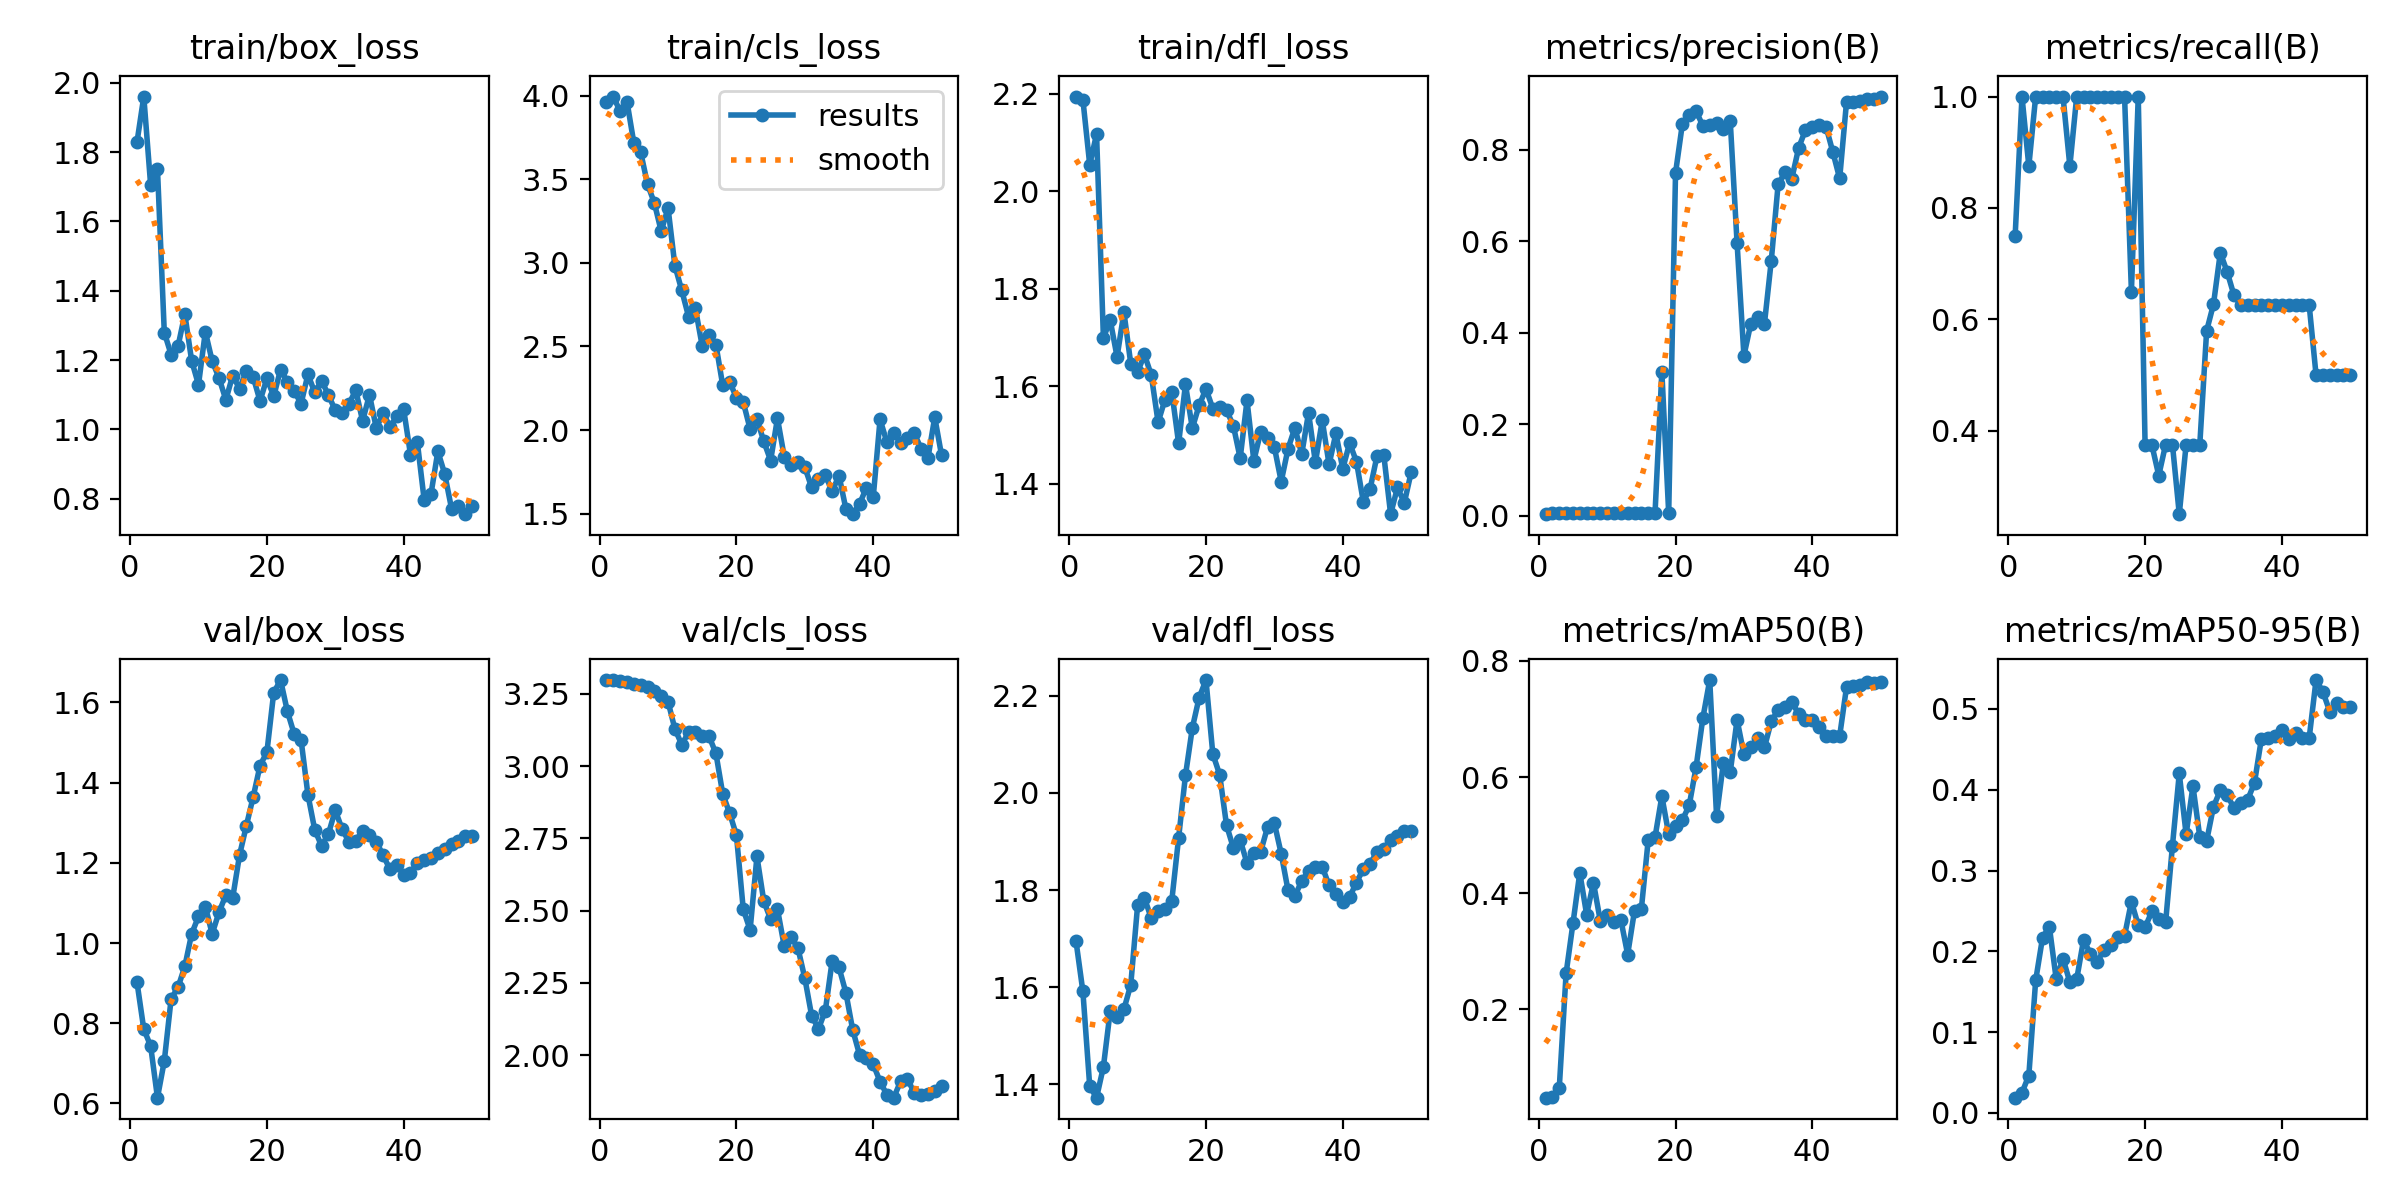

In [15]:
import os
from IPython.display import Image

# Tìm thư mục runs/detect/ gần nhất
detect_path = "runs/detect"
subdirs = [os.path.join(detect_path, d) for d in os.listdir(detect_path) if os.path.isdir(os.path.join(detect_path, d))]
latest_dir = max(subdirs, key=os.path.getmtime)

# Đường dẫn đến file kết quả
results_path = os.path.join(latest_dir, "results.png")

# Hiển thị nếu tồn tại
if os.path.exists(results_path):
    print(f"📊 Hiển thị biểu đồ từ: {results_path}")
    display(Image(filename=results_path, width=800))
else:
    print("❌ Không tìm thấy file results.png trong thư mục mới nhất.")


In [16]:
from google.colab import files

# Đường dẫn đến model tốt nhất (theo ảnh bạn gửi là train4)
best_model_path = "runs/detect/train4/weights/best.pt"

# Tải xuống
files.download(best_model_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
from google.colab import files

uploaded = files.upload()  # 👉 Chọn ảnh JPG/PNG từ máy bạn


Saving test.jpg to test.jpg


In [19]:
from ultralytics import YOLO
from IPython.display import Image, display
import os

# Load model đã train
model = YOLO("runs/detect/train4/weights/best.pt")

# Detect trên tất cả ảnh vừa upload
for filename in uploaded.keys():
    results = model.predict(source=filename, conf=0.3, save=True)



image 1/1 /content/test.jpg: 640x640 1 chai_nuoc, 16.5ms
Speed: 8.2ms preprocess, 16.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


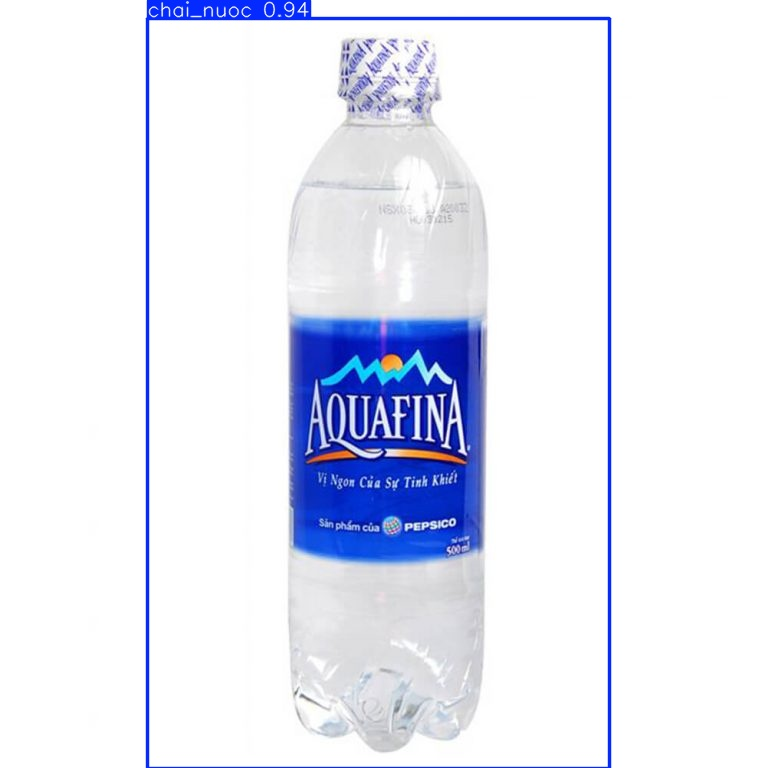

In [20]:
# Tìm thư mục chứa ảnh kết quả gần nhất
import glob

latest_dir = sorted(glob.glob("runs/detect/predict*"))[-1]

# Hiển thị ảnh kết quả
for img_file in os.listdir(latest_dir):
    if img_file.endswith(('.jpg', '.png')):
        display(Image(filename=os.path.join(latest_dir, img_file)))


In [21]:
from google.colab import files

uploaded = files.upload()  # 👉 Chọn ảnh JPG/PNG từ máy bạn


Saving test1.jpg to test1.jpg


In [22]:
from ultralytics import YOLO
from IPython.display import Image, display
import os

# Load model đã train
model = YOLO("runs/detect/train4/weights/best.pt")

# Detect trên tất cả ảnh vừa upload
for filename in uploaded.keys():
    results = model.predict(source=filename, conf=0.3, save=True)


image 1/1 /content/test1.jpg: 640x640 (no detections), 7.6ms
Speed: 9.3ms preprocess, 7.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


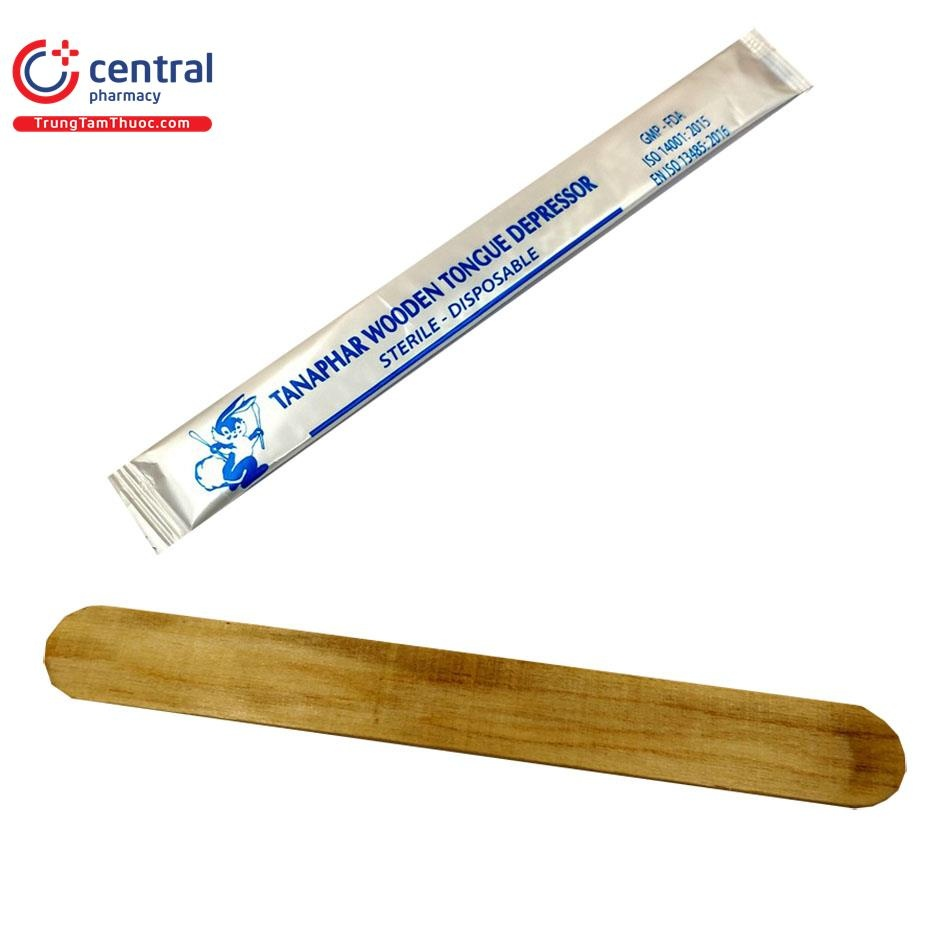

In [23]:
# Tìm thư mục chứa ảnh kết quả gần nhất
import glob

latest_dir = sorted(glob.glob("runs/detect/predict*"))[-1]

# Hiển thị ảnh kết quả
for img_file in os.listdir(latest_dir):
    if img_file.endswith(('.jpg', '.png')):
        display(Image(filename=os.path.join(latest_dir, img_file)))


In [24]:
from google.colab import files

uploaded = files.upload()  # 👉 Chọn ảnh JPG/PNG từ máy bạn


Saving test3.webp to test3.webp


In [25]:
from ultralytics import YOLO
from IPython.display import Image, display
import os

# Load model đã train
model = YOLO("runs/detect/train4/weights/best.pt")

# Detect trên tất cả ảnh vừa upload
for filename in uploaded.keys():
    results = model.predict(source=filename, conf=0.3, save=True)



image 1/1 /content/test3.webp: 448x640 (no detections), 37.2ms
Speed: 3.2ms preprocess, 37.2ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict3


In [26]:
from google.colab import files

uploaded = files.upload()  # 👉 Chọn ảnh JPG/PNG từ máy bạn


Saving test4.webp to test4.webp


In [27]:
from ultralytics import YOLO
from IPython.display import Image, display
import os

# Load model đã train
model = YOLO("runs/detect/train4/weights/best.pt")

# Detect trên tất cả ảnh vừa upload
for filename in uploaded.keys():
    results = model.predict(source=filename, conf=0.3, save=True)



image 1/1 /content/test4.webp: 640x640 1 chai_nuoc, 16.2ms
Speed: 18.0ms preprocess, 16.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4


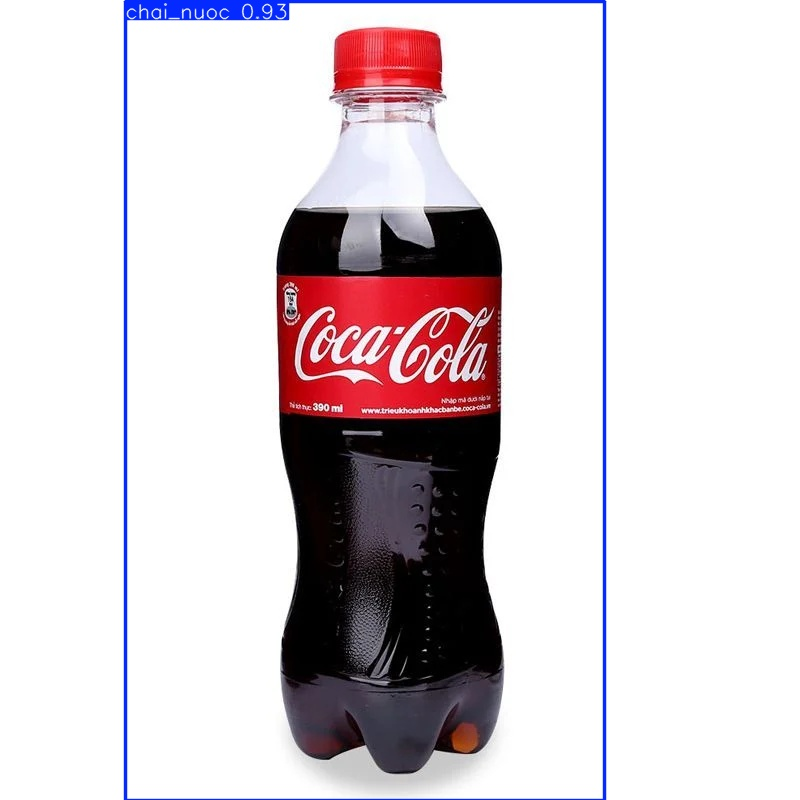

In [28]:
# Tìm thư mục chứa ảnh kết quả gần nhất
import glob

latest_dir = sorted(glob.glob("runs/detect/predict*"))[-1]

# Hiển thị ảnh kết quả
for img_file in os.listdir(latest_dir):
    if img_file.endswith(('.jpg', '.png')):
        display(Image(filename=os.path.join(latest_dir, img_file)))


In [29]:
from google.colab import files

uploaded = files.upload()  # 👉 Chọn ảnh JPG/PNG từ máy bạn

Saving test5.jpg to test5.jpg


In [30]:
from ultralytics import YOLO
from IPython.display import Image, display
import os

# Load model đã train
model = YOLO("runs/detect/train4/weights/best.pt")

# Detect trên tất cả ảnh vừa upload
for filename in uploaded.keys():
    results = model.predict(source=filename, conf=0.3, save=True)



image 1/1 /content/test5.jpg: 640x640 1 nap_chai, 8.7ms
Speed: 3.4ms preprocess, 8.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict5


In [31]:
from google.colab import files

uploaded = files.upload()  # 👉 Chọn ảnh JPG/PNG từ máy bạn

Saving test6.png to test6.png


In [32]:
from ultralytics import YOLO
from IPython.display import Image, display
import os

# Load model đã train
model = YOLO("runs/detect/train4/weights/best.pt")

# Detect trên tất cả ảnh vừa upload
for filename in uploaded.keys():
    results = model.predict(source=filename, conf=0.3, save=True)



image 1/1 /content/test6.png: 480x640 1 nit, 38.1ms
Speed: 3.0ms preprocess, 38.1ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict6


In [33]:
from google.colab import files

uploaded = files.upload()  # 👉 Chọn ảnh JPG/PNG từ máy bạn

Saving test7.jpg to test7.jpg


In [34]:
from ultralytics import YOLO
from IPython.display import Image, display
import os

# Load model đã train
model = YOLO("runs/detect/train4/weights/best.pt")

# Detect trên tất cả ảnh vừa upload
for filename in uploaded.keys():
    results = model.predict(source=filename, conf=0.3, save=True)



image 1/1 /content/test7.jpg: 640x640 4 bong_bays, 14.1ms
Speed: 4.4ms preprocess, 14.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict7


In [35]:
from google.colab import files

uploaded = files.upload()  # 👉 Chọn ảnh JPG/PNG từ máy bạn

Saving test8.png to test8.png


In [36]:
from ultralytics import YOLO
from IPython.display import Image, display
import os

# Load model đã train
model = YOLO("runs/detect/train4/weights/best.pt")

# Detect trên tất cả ảnh vừa upload
for filename in uploaded.keys():
    results = model.predict(source=filename, conf=0.3, save=True)



image 1/1 /content/test8.png: 480x640 1 ong_hut, 6.8ms
Speed: 2.4ms preprocess, 6.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict8


In [37]:
from google.colab import files

uploaded = files.upload()  # 👉 Chọn ảnh JPG/PNG từ máy bạn

Saving test9.jpg to test9.jpg


In [38]:
from ultralytics import YOLO
from IPython.display import Image, display
import os

# Load model đã train
model = YOLO("runs/detect/train4/weights/best.pt")

# Detect trên tất cả ảnh vừa upload
for filename in uploaded.keys():
    results = model.predict(source=filename, conf=0.3, save=True)



image 1/1 /content/test9.jpg: 608x640 (no detections), 44.3ms
Speed: 3.3ms preprocess, 44.3ms inference, 1.0ms postprocess per image at shape (1, 3, 608, 640)
Results saved to runs/detect/predict9


In [39]:
from google.colab import files

uploaded = files.upload()  # 👉 Chọn ảnh JPG/PNG từ máy bạn

Saving test10.jpg to test10.jpg


In [40]:
from ultralytics import YOLO
from IPython.display import Image, display
import os

# Load model đã train
model = YOLO("runs/detect/train4/weights/best.pt")

# Detect trên tất cả ảnh vừa upload
for filename in uploaded.keys():
    results = model.predict(source=filename, conf=0.3, save=True)



image 1/1 /content/test10.jpg: 640x640 (no detections), 7.8ms
Speed: 2.3ms preprocess, 7.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict10


In [41]:
from google.colab import files

uploaded = files.upload()  # 👉 Chọn ảnh JPG/PNG từ máy bạn

Saving test11.jpg to test11.jpg


In [42]:
from ultralytics import YOLO
from IPython.display import Image, display
import os

# Load model đã train
model = YOLO("runs/detect/train4/weights/best.pt")

# Detect trên tất cả ảnh vừa upload
for filename in uploaded.keys():
    results = model.predict(source=filename, conf=0.3, save=True)



image 1/1 /content/test11.jpg: 640x640 1 giay_mau, 11.2ms
Speed: 4.4ms preprocess, 11.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict11


In [43]:
from google.colab import files

uploaded = files.upload()  # 👉 Chọn ảnh JPG/PNG từ máy bạn

Saving test12.jpg to test12.jpg


In [44]:
from ultralytics import YOLO
from IPython.display import Image, display
import os

# Load model đã train
model = YOLO("runs/detect/train4/weights/best.pt")

# Detect trên tất cả ảnh vừa upload
for filename in uploaded.keys():
    results = model.predict(source=filename, conf=0.3, save=True)



image 1/1 /content/test12.jpg: 640x640 1 nap_chai, 15.6ms
Speed: 5.7ms preprocess, 15.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict12


In [45]:
from google.colab import files

uploaded = files.upload()  # 👉 Chọn ảnh JPG/PNG từ máy bạn

Saving test13.jpg to test13.jpg


In [46]:
from ultralytics import YOLO
from IPython.display import Image, display
import os

# Load model đã train
model = YOLO("runs/detect/train4/weights/best.pt")

# Detect trên tất cả ảnh vừa upload
for filename in uploaded.keys():
    results = model.predict(source=filename, conf=0.3, save=True)



image 1/1 /content/test13.jpg: 640x640 1 que_xien, 8.6ms
Speed: 3.0ms preprocess, 8.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict13


In [49]:
from google.colab import files

uploaded = files.upload()  # 👉 Chọn ảnh JPG/PNG từ máy bạn

Saving test15.jpg to test15.jpg


In [50]:
from ultralytics import YOLO
from IPython.display import Image, display
import os

# Load model đã train
model = YOLO("runs/detect/train4/weights/best.pt")

# Detect trên tất cả ảnh vừa upload
for filename in uploaded.keys():
    results = model.predict(source=filename, conf=0.3, save=True)



image 1/1 /content/test15.jpg: 640x640 2 que_de_luois, 7.8ms
Speed: 3.8ms preprocess, 7.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict15
